In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# zscore
from scipy.stats import zscore
# scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
# partitioning
from sklearn.model_selection import train_test_split
# naive bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# plot things
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [2]:
df = pd.read_csv("ravdess_features.csv")

## Classification

### Choice of attributes

Each of us select a classification method and then select two variables, one to be classified by ourselves and one to be compared with the other methods, as clustering.
Classification methods:

* Naive Bayes - Claudio
* kNN - Andrea
* Decision trees - Steffania

Possible variables:

* Categorical: emotion, sex
* Numerical: intensity

We select these variables because they seems to us the most interesting variables to predict.

## Partitioning and Naive Bayes

In [3]:
def doublepartition_df(df, value1, value2, attribute1, attribute2):
    tmp = df.copy()
    ret = {}
    partitions = tmp[attribute1].unique()
    for p in partitions:
        ret[p] = df[(tmp[attribute1] == p)]
    tmp = ret[value1].copy()
    ret2 = {}
    partitions = tmp[attribute2].unique()
    for p in partitions:
        ret2[p] = ret[value1][(tmp[attribute2] == p)]
    ret2 = ret2[value2].drop(columns = ["modality", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "channels", "frame_width"]).dropna()
    return ret2

#### Gaussian

In [41]:
def naive_bayes(df, pred):
    y = np.array(df[pred])
    categorical_cols = ["emotion", "sex"]
    df = pd.get_dummies(df, columns=categorical_cols)
    X = df.values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=0
    )
    print("Stratify:\n")
    print(np.unique(y, return_counts=True)[1] / len(y))
    print(np.unique(y_train, return_counts=True)[1] / len(y_train))
    print(np.unique(y_test, return_counts=True)[1] / len(y_test))
    print("\nShapes:\n")
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, "\n")
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification report:\n")
    print(classification_report(y_test, y_pred))
    print("ROC curve:\n")
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    plt.rcParams["figure.figsize"] = [12, 8]
    plot_roc(y_test, clf.predict_proba(X_test))
    plt.show()
    #try:
    print("ROC AUC score: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))
    #except ValueError:
    #    pass

In [5]:
attr_part1 = "statement"
val1 = "Kids are talking by the door"

attr_part2 = "emotional_intensity"
val2 = "strong"

kids_strong = doublepartition_df(df, val1, val2, attr_part1, attr_part2)
kids_strong.T

,13,16,17,18,22,29,35,36,38,43,...,2394,2395,2400,2416,2417,2428,2433,2436,2441,2442
emotion,calm,calm,fearful,angry,fearful,surprised,angry,fearful,fearful,calm,...,sad,happy,happy,fearful,angry,surprised,happy,happy,sad,sad
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
sample_width,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
frame_rate,48000,48000,48000,48000,48000,48000,48000,48000,48000,48000,...,48000,48000,48000,48000,48000,48000,48000,48000,48000,48000
length_ms,4504,3971,3737,3904,3637,3837,4504,4137,4204,5072,...,3837,4104,4404,4838,4705,4137,4438,4271,5305,4872
frame_count,216216.0,190590.0,179379.0,187388.0,174575.0,184184.0,216216.0,198598.0,201802.0,243444.0,...,184184.0,196997.0,211411.0,232232.0,225826.0,198599.0,213013.0,205005.0,254655.0,233834.0
intensity,-54.745974,-47.831966,-22.367588,-27.461209,-30.41386,-38.874822,-25.45817,-24.611364,-27.56825,-34.877249,...,-43.539869,-25.169836,-24.914071,-32.312589,-22.87656,-43.460545,-36.522822,-36.775127,-26.666414,-29.512788
zero_crossings_sum,13640,10575,21222,14749,16499,11703,20627,10885,17072,15835,...,11784,12562,17297,11755,12045,15672,12406,9012,11755,11043
mfcc_mean,-34.821735,-33.729385,-23.537529,-25.791014,-29.584751,-26.574883,-27.111847,-25.024746,-26.808258,-32.60896,...,-27.968382,-20.612392,-23.402376,-25.352774,-20.767807,-29.170189,-27.190395,-28.4094,-20.926167,-22.787794
mfcc_std,164.23001,160.28496,97.46727,111.2614,118.09067,135.42455,104.44275,103.02069,108.51158,132.7379,...,145.11029,104.25493,103.17724,124.38997,104.40976,145.77412,136.4705,136.80605,112.79364,113.3493


##### "Emotion"

Stratify:

[0.15343915 0.15608466 0.0978836  0.17195767 0.15608466 0.17195767
 0.09259259]
[0.15530303 0.15530303 0.09848485 0.17045455 0.15530303 0.17045455
 0.09469697]
[0.14912281 0.15789474 0.09649123 0.1754386  0.15789474 0.1754386
 0.0877193 ]

Shapes:

(264, 37) (114, 37) (264,) (114,) 

Classification report:

              precision    recall  f1-score   support

       angry       0.57      0.76      0.65        17
        calm       1.00      0.61      0.76        18
     disgust       0.73      0.73      0.73        11
     fearful       0.71      0.25      0.37        20
       happy       0.35      0.61      0.45        18
         sad       0.69      0.55      0.61        20
   surprised       0.53      0.80      0.64        10

    accuracy                           0.59       114
   macro avg       0.65      0.62      0.60       114
weighted avg       0.66      0.59      0.59       114

ROC curve:



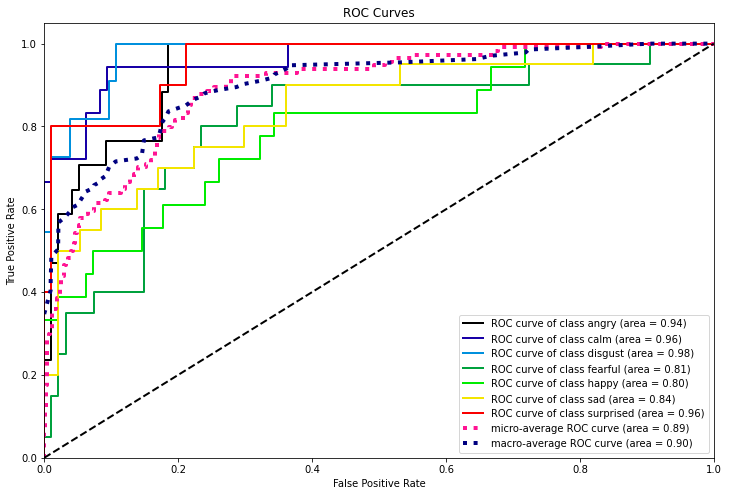

ROC AUC score:  0.8976020864261999


In [37]:
var_pred = "emotion" # <--- this is the variable prediction parameter
naive_bayes(kids_strong, var_pred)

Low reliability of the model for the _emotion_ prediction.

##### "Sex"

Stratify:

[0.47619048 0.52380952]
[0.47727273 0.52272727]
[0.47368421 0.52631579]

Shapes:

(264, 37) (114, 37) (264,) (114,) 

Classification report:

              precision    recall  f1-score   support

           F       0.89      0.93      0.91        54
           M       0.93      0.90      0.92        60

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

ROC curve:



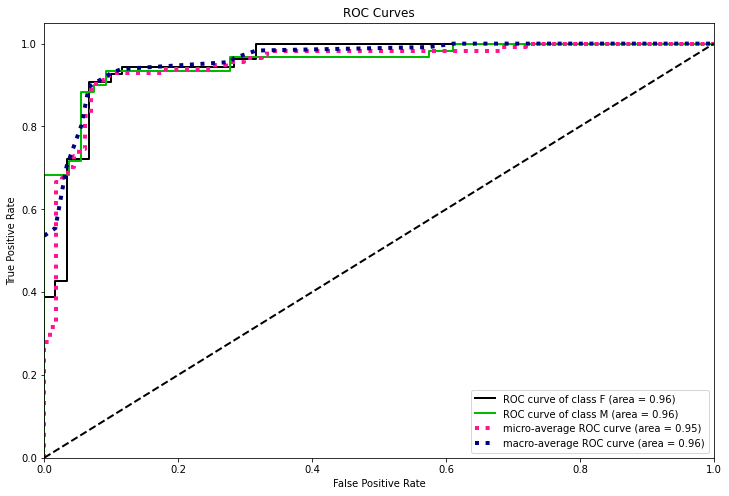

ValueError: y should be a 1d array, got an array of shape (114, 2) instead.

In [42]:
var_pred = "sex" # <--- this is the variable prediction parameter
naive_bayes(kids_strong, var_pred)

#### Categorical

In [38]:
def naive_bayes_cat(df, pred):
    y = np.array(df[pred])
    categorical_cols = ["emotion", "sex"]
    df = pd.get_dummies(df, columns=categorical_cols)
    X = df.values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=0
    )
    non_cat_columns = [ # commented variables contain redundant values that prevent NB from working properly
        "intensity",
        "zero_crossings_sum",
        "length_ms",
        "frame_count",
        #"sample_width",
        #"frame_rate",
        "mfcc_mean",
        "mfcc_min",
        "mfcc_max",
        "mfcc_std",
        "sc_mean",
        #"sc_min",
        "sc_max",
        "sc_std",
        "sc_kur",
        "sc_skew",
        "stft_mean",
        #"stft_min",
        #"stft_max",
        "stft_std",
        "stft_kur",
        "stft_skew",
        "mean",
        "std",
        "min",
        "max",
        "skew",
        "kur"
    ]

    X_noncat = kids_strong[non_cat_columns].values

    X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
        X_noncat, y, test_size=0.3, stratify=y, random_state=0
    )

    # train and test set should be binned separately
    X_train_cat = list()
    for column_idx in range(X_train_noncat.shape[1]):
        X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
    X_train_cat = np.array(X_train_cat).T

    X_test_cat = list()
    for column_idx in range(X_test_noncat.shape[1]):
        X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
    X_test_cat = np.array(X_test_cat).T

    print("Shapes:\n")
    print(X_train_cat.shape, X_test_cat.shape)
    clf = CategoricalNB()
    clf.fit(X_train_cat, y_train_noncat)
    y_pred = clf.predict(X_test_cat)
    print("\nClassification report:\n")
    print(classification_report(y_test, y_pred))
    print("ROC curve:\n")
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    plt.rcParams["figure.figsize"] = [12, 8]
    plot_roc(y_test_noncat, clf.predict_proba(X_test_cat))
    plt.show()
    try:
        print("ROC AUC score: ", roc_auc_score(y_test_noncat, clf.predict_proba(X_test_cat), multi_class="ovr", average="macro"))
    except ValueError:
        pass

##### "Emotion"

Shapes:

(264, 23) (114, 23)

Classification report:

              precision    recall  f1-score   support

       angry       0.50      0.82      0.62        17
        calm       0.56      0.83      0.67        18
     disgust       0.75      0.55      0.63        11
     fearful       0.38      0.25      0.30        20
       happy       0.33      0.28      0.30        18
         sad       0.64      0.35      0.45        20
   surprised       0.58      0.70      0.64        10

    accuracy                           0.52       114
   macro avg       0.53      0.54      0.52       114
weighted avg       0.52      0.52      0.50       114

ROC curve:



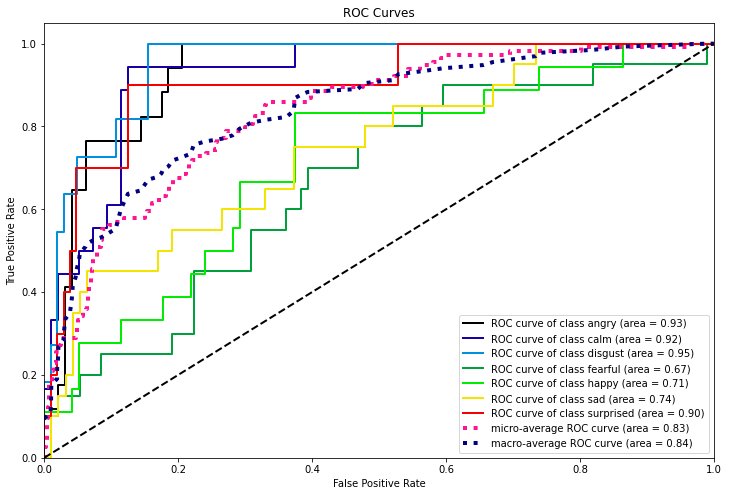

ROC AUC score:  0.8329313496025134


In [39]:
var_pred = "emotion" # <--- this is the variable prediction parameter
naive_bayes_cat(kids_strong, var_pred)

Very low reliability as regards the prediction of _emotion_ on the Categorical. The score of categorical test is lower than non categorical one.

##### "Sex"

Shapes:

(264, 23) (114, 23)

Classification report:

              precision    recall  f1-score   support

           F       0.80      0.76      0.78        54
           M       0.79      0.83      0.81        60

    accuracy                           0.80       114
   macro avg       0.80      0.80      0.80       114
weighted avg       0.80      0.80      0.80       114

ROC curve:



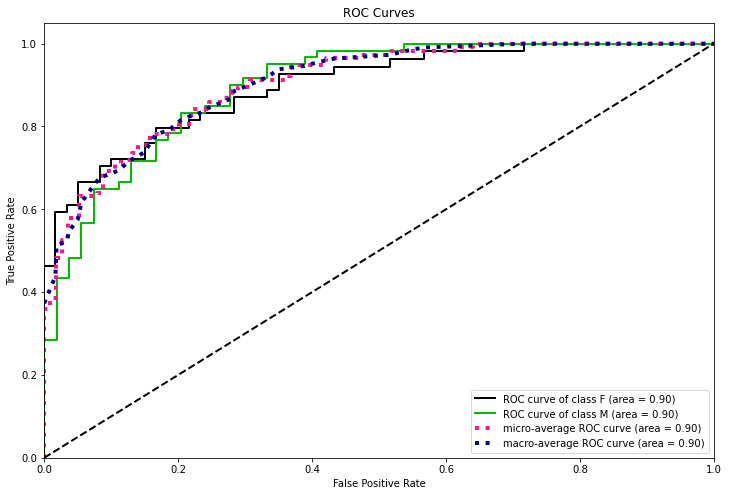

In [40]:
var_pred = "sex" # <--- this is the variable prediction parameter
naive_bayes_cat(kids_strong, var_pred)